In [1]:
import os, cv2, itertools
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils.np_utils import to_categorical
from tqdm import tqdm

from sklearn.utils import shuffle

import sklearn
from sklearn.model_selection import train_test_split

#Global variable contain training directory, testing directory, Fixed image size, and the color channel
training_directory = 'C:/CNTT/DATA/train'
testing_directory = 'C:/CNTT/DATA/test1'
IMG_SIZE = 60
CHANNEL = 3
LR = 1e-3

#Function to read image from absoulte file using Opencv

def read_image(file_path):
  #Read the image using imread function with 3 channel
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  #resize the image to be 60x60 pixe
  return cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)

#Prepare training data 
def create_train_data():
    X = []
    y = []
    for img in tqdm(os.listdir(training_directory)):
        name = img.split('.')[0]
        path = os.path.join(training_directory,img)
        img = read_image(path)
        img_arr = np.squeeze(img.reshape((IMG_SIZE, IMG_SIZE, CHANNEL))).astype('uint8')
        X.append(img_arr)
        if name=='cat': y.append(0)
        else: y.append(1)
    return np.array(X),np.array(y)

#Prepare testing data

def create_test_data():
    X = []
    y = []
    for img in tqdm(os.listdir(testing_directory)):
        path = os.path.join(testing_directory,img)
        img_num = img.split('.')[0]
        img = read_image(path)
        img_arr = np.squeeze(img.reshape((IMG_SIZE, IMG_SIZE, CHANNEL))).astype('uint8')
        X.append(img_arr)
        y.append(img_num)
    return np.array(X), np.array(y)


if __name__=='__main__':
    X, y = create_train_data()
    X_test, y_idx = create_test_data() 
    print(X.shape)
    print(y.shape)
    

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:46<00:00, 117.03it/s]

(25000, 60, 60, 3)
(25000,)


In [2]:
#shuffle data :X is input data and y is label 
X, y = shuffle(X, y)
#Split 25000 image into training set and validation test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(20000, 60, 60, 3)
(5000, 60, 60, 3)
(20000,)
(5000,)


In [3]:
#Nomarlization data
X_train_norm = X_train / 255
X_val_norm = X_val / 255


In [4]:
#create one hot vector
y_train_one_hot = to_categorical(y_train)
print(y_train_one_hot.shape)

num_classes = y_train_one_hot.shape[1]
print(num_classes)

y_val_one_hot = to_categorical(y_val)
print(y_val_one_hot.shape)

(20000, 2)
2
(5000, 2)


In [5]:
#Construct model architectures
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(IMG_SIZE, IMG_SIZE, CHANNEL), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0

In [6]:
#model fit data 
model.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=100, batch_size = 64)

Epoch 1/100
313/313 [==============================] - 110s 278ms/step - loss: 0.6963 - accuracy: 0.4974 - val_loss: 0.6917 - val_accuracy: 0.5020
Epoch 2/100
313/313 [==============================] - 87s 278ms/step - loss: 0.6940 - accuracy: 0.5004 - val_loss: 0.6843 - val_accuracy: 0.5544
Epoch 3/100
313/313 [==============================] - 87s 276ms/step - loss: 0.6887 - accuracy: 0.5367 - val_loss: 0.6730 - val_accuracy: 0.5996
Epoch 4/100
313/313 [==============================] - 84s 270ms/step - loss: 0.6614 - accuracy: 0.6140 - val_loss: 0.6166 - val_accuracy: 0.6770
Epoch 5/100
313/313 [==============================] - 86s 275ms/step - loss: 0.6103 - accuracy: 0.6724 - val_loss: 0.5683 - val_accuracy: 0.7196
Epoch 6/100
313/313 [==============================] - 87s 277ms/step - loss: 0.5623 - accuracy: 0.7168 - val_loss: 0.5015 - val_accuracy: 0.7594
Epoch 7/100
313/313 [==============================] - 86s 276ms/step - loss: 0.5278 - accuracy: 0.7452 - val_loss: 0.4949 

Epoch 57/100
313/313 [==============================] - 84s 268ms/step - loss: 0.2258 - accuracy: 0.9050 - val_loss: 0.3060 - val_accuracy: 0.8688
Epoch 58/100
313/313 [==============================] - 83s 266ms/step - loss: 0.2211 - accuracy: 0.9051 - val_loss: 0.2915 - val_accuracy: 0.8760
Epoch 59/100
313/313 [==============================] - 83s 265ms/step - loss: 0.2192 - accuracy: 0.9044 - val_loss: 0.2954 - val_accuracy: 0.8748
Epoch 60/100
313/313 [==============================] - 84s 267ms/step - loss: 0.2215 - accuracy: 0.9062 - val_loss: 0.2961 - val_accuracy: 0.8710
Epoch 61/100
313/313 [==============================] - 83s 267ms/step - loss: 0.2124 - accuracy: 0.9116 - val_loss: 0.2983 - val_accuracy: 0.8656
Epoch 62/100
313/313 [==============================] - 83s 265ms/step - loss: 0.2131 - accuracy: 0.9119 - val_loss: 0.3189 - val_accuracy: 0.8612
Epoch 63/100
313/313 [==============================] - 84s 268ms/step - loss: 0.2091 - accuracy: 0.9111 - val_loss: 0

In [7]:
model.save('cnn_cat_dog_tot_nghiep')

INFO:tensorflow:Assets written to: cnn_cat_dog_tot_nghiep\assets


In [8]:
import matplotlib.pyplot as plt
predict_classes = {0: 'cat',1: 'dog'}

def display(X, y, pos) :
    img = X[pos]
    plt.figure(figsize=(4,2))
    label = predict_classes[y[pos]]
    plt.imshow(img)
    plt.title(label='Image')
    plt.show()

def prediction(X, idx, model) :
    image = X[idx].reshape(1,IMG_SIZE,IMG_SIZE,3)
    image_class = predict_classes[model.predict_classes(image).item()]
    image = image.reshape((IMG_SIZE, IMG_SIZE, CHANNEL))
    plt.figure(figsize = (4,2))
    plt.imshow(image)
    plt.title("Image number {}, Prediction is {}".format(idx, image_class))
    plt.show()

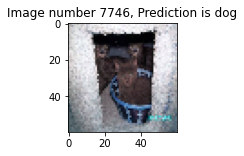

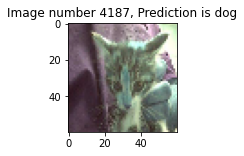

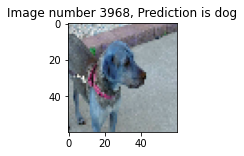

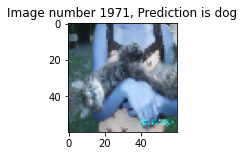

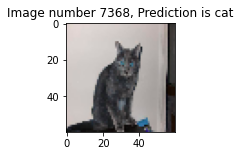

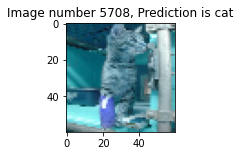

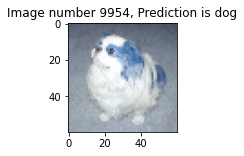

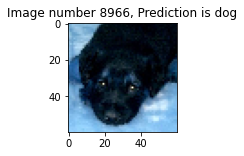

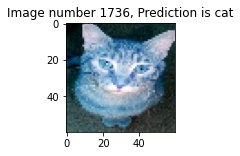

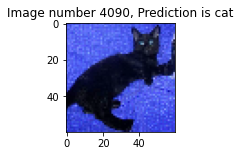

In [11]:
import random
import keras.models
load_model = keras.models.load_model("cnn_cat_dog_tot_nghiep")
if __name__=='__main__':
    for i in range(0, 10):
        pos = random.randint(1,10000)
        prediction(X_test, pos, load_model)